In [4]:
'''
I. 사이킷런 소개와 특징
    - 책은 scikit-laern 0.19.1 버전 기준; 여기 설치된 scikit-learn은 0.23.2 버전(print(sklearn.__version__))
    
II. 첫번째 머신러닝 만들어보기 - 붓꽃 품종 예측하기
'''
from sklearn.datasets import load_iris # sklearn.datasets내 모듈은 사이킷런에서 자체적으로 제공하는 데이터세트를 생성하는 모듈
from sklearn.tree import DecisionTreeClassifier # sklearn.tree내 모듈은 트리 기반 ML 알고리즘을 구현한 클래스 모음
from sklearn.model_selection import train_test_split # sklearn.model_selection은 학습데이터와 검증 데이터를 분리하거나 최적의 하이퍼 파라미터(최적의 학습을 위해 직접 입력하는 파라미터 통칭)로 평가하기 위한 모듈 모음
import pandas as pd

#데이터 로딩
iris = load_iris()

iris_data = iris.data #iris.data는 데이터세트에서 피처만으로 된 numpy
iris_label = iris.target #iris.target은 데ㅣ터 세트에서 레이블 데이터로만 된 numpy
print(iris_label)
print(iris.target_names)

#데이터 프레임으로 변환
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
#학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 11) #random_state는 호출할 때마다 같은 학습/테스트 용 데이터를 생성하기 위해 주어지는 난수값(seed와 같은 의미)

#학습

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11) # random_state=11 역시 동일한 결과를 출력하기 위한 실습용
#학습 수행
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=11)

In [7]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터로 예측 수행
pred = dt_clf.predict(X_test) #예측값 반환

#성능 평가
from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9333


In [10]:
'''
III. 사이킷런의 기반 프레임워크 익히기
    1. Estimator 이해 및 fit(), predict() 메서드
        - 모델학습은 fit(), 예측은 predict()
        - 분류기반 ML모델은 Classifier로, 회귀기반 ML모델은 Regressor로 명칭, 두개를 합쳐서 Estimator 클래스라고 부름
        - cross_val_score() 와 같은 evaluate 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝 지원 클래스의 경우 Estimator를 인자로 받음
        - 비 지도학습인 차원축소, 클러스터링, 피처추출 등을 구현한 클래스는 fit()과 transform()을 지원,여기서 fit()은 분류, 회귀 등의 지도학습과 달리 입력데이터의 형태를 맞추는 작업, transform()은 fit()으로 변환한 데이터의 차원 변환, 클러스터링 등을 진행
    
    2. 사이킷런의 주요 모듈
        - 예제 데이터 : sklearn.datasets
        - 피처 처리 : sklearn.preprocessing(인코딩, 정규화, 스케일링), sklearn.feature_selection, sklearn.feature_extraction(벡터화된 피처 추출, 이미지는 .image, 텍스트는 .text)
        - 피처 처리 & 차원 축소 : sklearn.decomposition(PCA, NMF, Truncated SVD)
        - 데이터 분리, 검증 & 파라미터 튜닝 : sklearn.model_selection
        - 평가 : sklearn.metrics(Accuracy, Precision, Recall, ROC-AUC, RMSE)
        - ML 알고리즘 : 
            sklearn.ensemble(랜덤포레스트, 에이다 부스트, 그래디언트 부스팅)
            sklearn.linear_model(선형회귀, 릿지, 라쏘, 로지스틱회귀, Stochastic Gradient Descent)
            sklearn.naive_bayes(가우시안, 다항분포 NB 등)
            sklearn.neighbors(k-nn)
            sklearn.svm(서포트 벡터머신)
            sklearn.tree(의사결정 트리)
            sklearn.cluster(K-평균, 계층형, DBSCAN 등)
        - 유틸리티 : sklearn.pipeline(변환, 학습, 예측 등을 함께 묶어서 실행)
    
    3. 내장된 예제 데이터 세트
        - datasets.load_boston() : 회귀용도, 미국 보스턴의 집 피처/ 가격
        - datasets.load_beast_cancer(): 분류용도, 유방암
        - datasets.load_diabetes() :회귀용도, 당뇨
        - datasets.load_digits() : 분류용도, 0~9 이미지
        
        - fetch 계열의 명령은 데이터 크기가 커서 직접 인터넷에서 내려받아 홈 디렉터리 - scikit_learn_data에 저장후 사용하는 데이터
            - fetch_covtype() : 회귀분석용 토지조사
            - fetch_20newsgroup() : 뉴스그룹 텍스트 자료
            - fetch_olivetti_faces() : 얼굴 이미지 자료
            - fetch_lfw_people() : 얼굴이미지
            - fetch_lfw_paris() : 얼굴 이미지
            - fetch_rcv1() : 로이터 뉴스 말뭉치
            - fetch_mldata() : ML웹사이트에서 다운로드
        
        - 분류 표본 데이터 생성기 : datasets.make_classifications
        - 클러스터링 표본 데이터 생성기 : datasets.make_blobs()
        
        - 예제데이터는 딕셔너리로 구성, 키는 data, target, target_name, feature_names, DESCR(문자열 데이터로 데이터 설명)
 '''
print(type(iris)) #Bunch는 sklearn에서 사용하는 딕셔너리
print(iris.keys())
print(iris.data)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5

In [19]:
'''
IV. Model Selection 모듈 소개
    1. 학습, 테스트 데이터 세트 분리 - train_test_split()
        - train_test_split(test_size = , shuffle = True, random_state = )
    
    2. 교차 검증
        - 과적합 방지
        - 학습데이터를 다시 학습데이터와 검증데이터로 나누어 모델의 성능을 일차로 평가, 모든 학습/검증이 완료되면 최종적으로 테스트 데이터 사용
        
        (i) K 폴드 교차 검증
            - 학습데이터를 K개 만큼 나누어서 K번의 학습과 검증 평가를 반복적으로 수행
            - K번의 검증 데이터 예측을 통해 나온 결과를 평균해서 최종 결과로 반영
'''
from sklearn.model_selection import KFold
import numpy as np

# 붓꽃 데이터 K 폴드 교차 검증
iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=16)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []

n_iter = 0

# Kflod 객체의 split()을 호출해 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features): #이미 kfold 안에 반복횟수 5번이 들어가 있는 것!
    #kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index] # features[[1,2,3]] -> 1,2,3 번째 데이터 슬라이싱(리스트로 슬라이싱)
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    #반복시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차검증정확도 : {1}, 학습데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter,accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
#개별 iteration 별 정확도를 합하여 평균 정확도 계산
print('\n##평균 검증 정확도: ', np.mean(cv_accuracy))


#1 교차검증정확도 : 1.0, 학습데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차검증정확도 : 1.0, 학습데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차검증정확도 : 0.8667, 학습데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차검증정확도 : 0.9333, 학습데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차검증정확도 : 0.7333, 학습데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

##평균 검증 정확도:  0.9066599999999999


In [25]:
'''
        (ii) Stratified K 폴드
            - 불균형 분포를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식 ; 불균형 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 적은 경우
            - 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습/검증 데이터 세트를 분배
'''
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']): #인자로 피처데이터와 레이블 데이터 두개가 모두 들어감
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 :{}'.format(n_iter))
    print('학습 레이블 데이터 분포 :\n', label_train.value_counts())
    print('검증 레이블 데이터 분포 :\n', label_test.value_counts())

## 교차 검증 :1
학습 레이블 데이터 분포 :
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 1    17
0    17
2    16
Name: label, dtype: int64
## 교차 검증 :2
학습 레이블 데이터 분포 :
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 2    17
0    17
1    16
Name: label, dtype: int64
## 교차 검증 :3
학습 레이블 데이터 분포 :
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 2    17
1    17
0    16
Name: label, dtype: int64


In [26]:
#Stratified KFold 를 이용해 실제로 검증을 해보면
iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
skfold = StratifiedKFold(n_splits=3)
cv_accuracy = []

n_iter = 0

# Kflod 객체의 split()을 호출해 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in skfold.split(features, label): #이미 kfold 안에 반복횟수 5번이 들어가 있는 것!
    #kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index] # features[[1,2,3]] -> 1,2,3 번째 데이터 슬라이싱(리스트로 슬라이싱)
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    #반복시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차검증정확도 : {1}, 학습데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter,accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
#개별 iteration 별 정확도를 합하여 평균 정확도 계산
print('\n##평균 검증 정확도: ', np.mean(cv_accuracy))


#1 교차검증정확도 : 0.98, 학습데이터 크기 : 100, 검증 데이터 크기 : 50
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차검증정확도 : 0.94, 학습데이터 크기 : 100, 검증 데이터 크기 : 50
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차검증정확도 : 0.98, 학습데이터 크기 : 100, 검증 데이터 크기 : 50
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

##평균 검증 정확도:  0.9666666666666667


In [29]:
'''
        (iii) 교차 검증을 보다 간편하게 - cross_val_score()
            - cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
            - cross_va_scoe()는 classifier가 입력되면 Stratified K 폴드 방식으로(회귀는 KFold 방식으로) 데이터 분할
            - cv는 교차검증 횟수
            - 배열로 값 반환
'''
from sklearn.model_selection import cross_val_score, cross_validate #cross_validate는 여러개의 평가지표를 반환 가능

data = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

#정확성, 교차검증은 3세트
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3) #cross_val_scoe은 array로 값 반환
print('교차 검증별 정확도 :', np.round(scores,4))
print('평균 검증 정확도', np.mean(scores))

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도 0.9666666666666667


In [32]:
'''
    3. GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 동시에 수행
        - GridSearchCV는 교차검증기반으로 하이퍼 파라미터의 최적값을 찾게 해줌
'''
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state=121)

dtree = DecisionTreeClassifier()

#파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth' : [1,2,3], 'min_samples_split' : [2,3]} # 의사결정 트리에서 중요 하이퍼 파라미터인 max_depth와 min_samples_split 값을 설정

grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=3, refit = True) # refit = True가 디폴트, 가장 좋은 하이퍼파라미터로 모델을 재학습
#붓꽃 학습 데이터로 pram_grid의 하이퍼 파라미터를 순차적으로 학습, 평가
grid_dtree.fit(X_train, y_train)

#GridSearhCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_) # cv_results_는 gridsearchcv의 결과 세트로 딕셔너리 형태
scores_df[['params', 'mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]
# max_depth = 3, min_samples_split = 2 or 3이 최적의 하이퍼 파라미터

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [33]:
# GridSearchCV에서 fit()을 수행하면 최적 하이퍼 파라미터 값과 결과가 각각 다음에 저장
print(grid_dtree.best_params_)
print(grid_dtree.best_score_)

{'max_depth': 3, 'min_samples_split': 2}
0.975


In [34]:
# refit = True -> 최적의 하이퍼 파라미터로 학습된 모델을 다음과 같이 저장
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print(accuracy_score(y_test, pred))

0.9666666666666667


In [38]:
'''
V. 데이터 전처리
    - ML 에서 결손값은 허용 안됨
    - 문자열 값 입력 불가 -> 인코딩 필요
    
    1. 데이터 인코딩
        (i) 레이블 인코딩
            - 카테고리 피처를 코드형 숫자값으로 변환
            - LabelEncoder 클래스 이용
            - 숫자값으로 변환하는 경우 숫자의 크고 작음이 머신러닝 결과에 영향을 줄 수 있음
'''
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder() #객체생성
encoder.fit(items)
labels = encoder.transform(items)
print(labels)
print(encoder.classes_) #속성값 확인
print(encoder.inverse_transform([4,5,2,0,1,1,3,3])) #디코딩

[0 1 4 5 3 3 2 2]
['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [54]:
'''
        (ii) 원-핫 인코딩
            - 레이블 인코딩의 단점 해결
            - OneHotEncoder 클래스 이용
            - 입력값은 숫자 + 2차원데이터 필요
'''
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#먼저 숫자값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

#2차원 데이터로 변환
labels = labels.reshape(-1,1)

#원핫 인코딩
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print(oh_labels.toarray())

#판다스에서 원-핫 인코딩을 더 쉽게 지원하는 API 존재
import pandas as pd
df = pd.DataFrame({'item' : ['TV', '냉장고', '전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
a = pd.get_dummies(df)
print(np.array(a.values.tolist(), dtype = np.float32))

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [55]:
'''
    2. 피처 스케일링과 정규화
        - 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링이라고 함 -> 대표적인 방법으로 표준화와 정규화
        - 표준화는 x - u / std
        - 정규화는 x - min(x) / max(x) - min(x) 인데 사이킷런은 선형대수가 적용 돼서 x/ sqrt(x^2 + y^2 + z^2)
        
        (i) StandardScaler
            - 개별 피처를 평균이 0이고 분산이 1인 값으로 변환
            - RBF 커널을 이용하는 SVM, 선형회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가정했기 때문에 표준화를 해줌으로써 성능을 높일 수 있음
'''
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

print(iris_df.mean())
print(iris_df.var())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [57]:
#표준화
from sklearn.preprocessing import StandardScaler

#객체생성
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform() 시 데이터 세트가 ndarray로 변환되므로 이를 df로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)
print(iris_df_scaled.mean())
print(iris_df_scaled.var())

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [59]:
'''
        (ii) MinMaxScaler
            - 데이터의 값을 0과 1사이의 범위값으로 변환(음수가 있으면 -1에서 1사이의 값으로 변환)
            - 데이터의 분포가 가우시안 분포가 아닐때 적용
'''
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(iris_scaled, columns=iris.feature_names)
print(iris_df_scaled.mean())
print(iris_df_scaled.var())
print(iris_df_scaled.max())
print(iris_df_scaled.min())

sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64


In [60]:
'''
    3. 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
        - fit() -> 데이터 변환을 위한 정보 설정, transform() -> 실제로 변환 실행, fit_transform() -> 도시에 실행
        - fit(), transform() 은 2차원 이상 데이터만 입력 가능
        - 학습 데이터와 테스트 데이터는 같은 fit()이 적용된 scaler 이용해야 함에 주의 -> 따라서 fit_transform()은 테스트 데이터에서는 절대 사용하면 안됨!
        - 테스트,학습 데이터로 분리하기 전 스케일링을 먼저 적용하는게 바람직

VI. 사이킷런으로 수행하는 타이타닉 생존자 예측
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('train.csv')
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
# 머신러닝은 결측값을 허용하지 않으므로 보간작업
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True) #나이는 평균나이로
titanic_df['Cabin'].fillna('N', inplace=True) #빈 문자열은 N으로 채우기
titanic_df['Embarked'].fillna('N', inplace=True)
print(titanic_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [66]:
# 문자열 피처 확인
print(titanic_df['Sex'].value_counts())
print(titanic_df['Cabin'].value_counts()) 
print(titanic_df['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
N              687
C23 C25 C27      4
G6               4
B96 B98          4
E101             3
              ... 
B101             1
A19              1
B19              1
B79              1
E34              1
Name: Cabin, Length: 148, dtype: int64
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [67]:
#Cabin 의 경우 선실등급을 나타내는 앞 알파벳만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

In [70]:
#데이터 탐색 - 성별 별로 생존자 비교(위급상황시 여성과 어린이가 우선구조되기 때문)
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

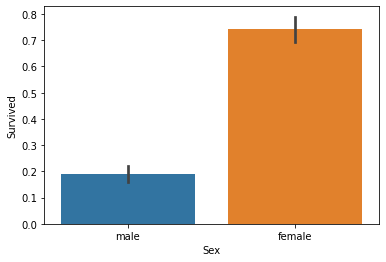

In [71]:
#시각화하면
sns.barplot(x='Sex', y='Survived', data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

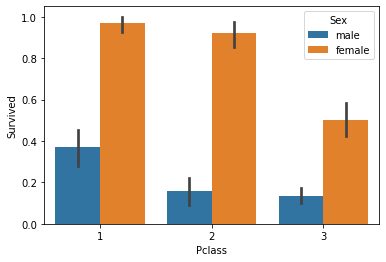

In [72]:
# 객실등급으로 판단한 부자와 가난한 사람간의 생존확률을 성별별로 구해보면
sns.barplot(x='Pclass',y='Survived', hue='Sex', data=titanic_df)

In [97]:
titanic_df.groupby(['Sex','Survived','Pclass'])['Survived'].count()

Sex     Survived  Pclass
female  0         1           3
                  2           6
                  3          72
        1         1          91
                  2          70
                  3          72
male    0         1          77
                  2          91
                  3         300
        1         1          45
                  2          17
                  3          47
Name: Survived, dtype: int64

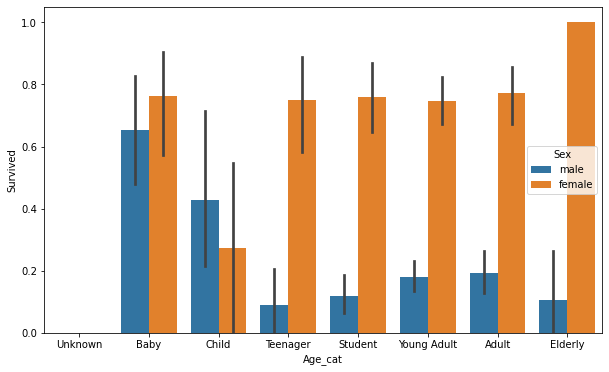

In [98]:
# Age에 따라 사람을 구별하고 생존 확률을 알아보면
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

plt.figure(figsize=(10,6))

#X축 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1, inplace = True)

#지금까지 분석한 결과 Age, Sex, PClass 등이 중요하게 생존을 좌우하는 피처임을 확임

In [99]:
# 다른 문자열 피처 인코딩
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [100]:
#지금까지 한 내용을 함수로 만들어 재사용할 수 있게 함
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [101]:
# 다시 피처 데이터 세트를 위 함수를 이용해서 만들어 보면
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [102]:
#데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state=11)

In [104]:
# 의사결정트리, 랜덤 포레스트, 로지스틱 회귀를 이용해서 생존자를 예측해보면
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 객체 새성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

#의사결정 트리 학습
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('의사결정 트리 정확도 :', accuracy_score(y_test, dt_pred))

#랜덤포레스트 학습
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤 포레스트 정확도 :', accuracy_score(y_test, rf_pred))

#로지스틱 회귀 학습
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱 회귀 정확도 :', accuracy_score(y_test, lr_pred))

의사결정 트리 정확도 : 0.7877094972067039
랜덤 포레스트 정확도 : 0.8547486033519553
로지스틱 회귀 정확도 : 0.8491620111731844


C:\Users\1\anaconda3\envs\virtualtensor3.7\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [105]:
# 교차 검증으로 트리 평가

from sklearn.model_selection import KFold
def exec_kfold(clf, folds = 5):
    #객체 생성
    kfold = KFold(n_splits = folds)
    scores = []
    
    #교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        #학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('{} 번째 교차 검증 정확도 : {}'.format(iter_count, accuracy))
    
    mean_score = np.mean(scores)
    print('평균 정확도 :', mean_score)
    
#호출
exec_kfold(dt_clf, 5)

0 번째 교차 검증 정확도 : 0.7541899441340782
1 번째 교차 검증 정확도 : 0.7808988764044944
2 번째 교차 검증 정확도 : 0.7865168539325843
3 번째 교차 검증 정확도 : 0.7696629213483146
4 번째 교차 검증 정확도 : 0.8202247191011236
평균 정확도 : 0.782298662984119


In [108]:
#cross_val_score 를 이용한 교차검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print('{}번째 교차 검증 정확도 : {}'.format(iter_count, accuracy))
    
print('평균 정확도 :', np.mean(scores))

0번째 교차 검증 정확도 : 0.7430167597765364
1번째 교차 검증 정확도 : 0.7752808988764045
2번째 교차 검증 정확도 : 0.7921348314606742
3번째 교차 검증 정확도 : 0.7865168539325843
4번째 교차 검증 정확도 : 0.8426966292134831
평균 정확도 : 0.7879291946519366


In [112]:
#GridSearchCV를 이용해 의사결정 트리 최적 하이퍼 파라미터 찾고 성능 측정
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2,3,5,10], 'min_samples_split' : [2,3,5], 'min_samples_leaf' : [1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('최고 정확도', grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

#최적 모델로 예측 및 평가
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('최적 모델에서 정확도 :', accuracy)

최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고 정확도 0.7991825076332119
최적 모델에서 정확도 : 0.8715083798882681


In [ ]:
'''
VII. 정리
'''